In [28]:
import numpy as np
import matplotlib.pyplot as plt

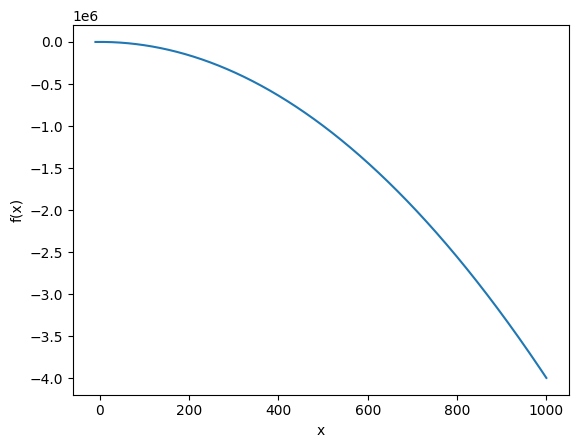

In [29]:
x = np.arange(-10, 1000, 0.05)
mu = 4
y = mu*x*(1-x)
plt.plot(x, y)
plt.ylabel("f(x)")
plt.xlabel("x")
plt.show()

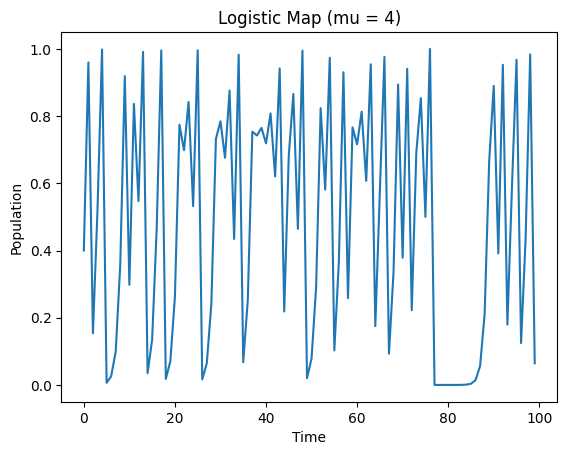

In [30]:
# plottinh the logistic map for 1 value of mu


def logistic_map(x0, mu, m):
    population = [x0]
    for i in range(m - 1):
        x0 = mu * x0 * (1 - x0)
        population.append(x0)
    return population
x0 = 0.4
mu = 4
iterations = 100

plt.plot(range(iterations),logistic_map(x0, mu, iterations))
plt.xlabel('Time')
plt.ylabel('Population')
plt.title(f'Logistic Map (mu = {mu})')
plt.show()

In [31]:
def LogisticMap_rand(x0, mu, n):
    rand_values = []
    x = x0
    for i in range(n):
        x = mu*x*(1-x)
        rand_values.append(x)
    return rand_values
x0 = np.random.rand(1) * (3-0.1) + 0.5
print(LogisticMap_rand(x0, 3.5, 5))

[array([-23.50383411]), array([-2015.76918245]), array([-14228694.08127879]), array([-7.08595123e+14]), array([-1.75737467e+30])]


[{2.9: {0.655}}, {2.901: {0.655}}, {2.902: {0.655}}, {2.903: {0.655}}, {2.904: {0.655}}, {2.905: {0.655}}, {2.906: {0.655}}, {2.907: {0.656}}, {2.908: {0.656}}, {2.909: {0.656}}, {2.91: {0.656}}, {2.911: {0.656}}, {2.912: {0.656}}, {2.913: {0.656}}, {2.914: {0.656}}, {2.915: {0.656}}, {2.916: {0.657}}, {2.917: {0.657}}, {2.918: {0.657}}, {2.919: {0.657}}, {2.92: {0.657}}, {2.921: {0.657}}, {2.922: {0.657}}, {2.923: {0.657}}, {2.924: {0.658}}, {2.925: {0.658}}, {2.926: {0.658}}, {2.927: {0.658}}, {2.928: {0.658}}, {2.929: {0.658}}, {2.93: {0.658}}, {2.931: {0.658}}, {2.932: {0.658}}, {2.933: {0.659}}, {2.934: {0.659}}, {2.935: {0.659}}, {2.936: {0.659}}, {2.937: {0.659}}, {2.938: {0.659}}, {2.939: {0.659}}, {2.94: {0.659}}, {2.941: {0.659}}, {2.942: {0.66}}, {2.943: {0.66}}, {2.944: {0.66}}, {2.945: {0.66}}, {2.946: {0.66}}, {2.947: {0.66}}, {2.948: {0.66}}, {2.949: {0.66}}, {2.95: {0.661}}, {2.951: {0.661}}, {2.952: {0.661}}, {2.953: {0.661}}, {2.954: {0.661}}, {2.955: {0.661}}, {2.956

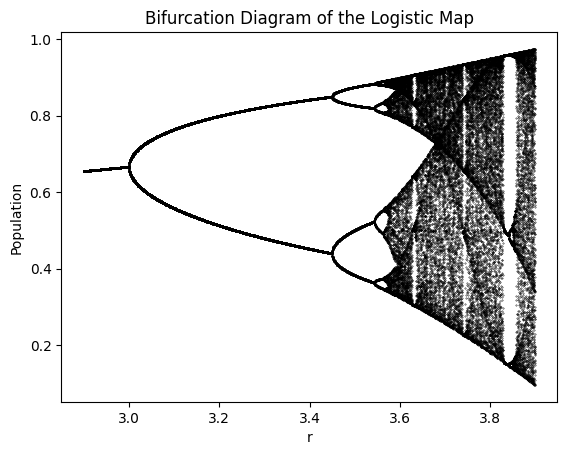

In [33]:
# plotting the bifurcation diagram 
x0 = 0.4
def truncate_number_strict(lst, decimal_places):
    factor = 10.0 ** decimal_places
    return [int(element * factor) / factor for element in lst]

def bifurcation_diagram(r_values, x0, transient_iterations, iterations):
    bifurcation_data = []
    uni = []
    len_s = []
    for r in r_values:

        transient_population = logistic_map(x0, r, transient_iterations)
        final_population = logistic_map(transient_population[-1], r, iterations)
        bifurcation_data.append(final_population)
        s = set(truncate_number_strict(final_population, 3))
        uni.append({r:s})
        len_s.append({r:len(s)})
    return bifurcation_data, uni, len_s

r_values = [i/1000 for i in range(2900, 3900)] 
transient_iterations = 10000
population_values = bifurcation_diagram(r_values, x0, transient_iterations, iterations)
bifuraction_data, uni, len_s = bifurcation_diagram(r_values, x0, transient_iterations, iterations) 

for i in range(len(r_values)):
    plt.plot([r_values[i]] * len(bifuraction_data[i]), bifuraction_data[i], 'k.', markersize=0.6)

print(uni)
print(len_s)
plt.xlabel('r')
plt.ylabel('Population')
plt.title('Bifurcation Diagram of the Logistic Map')
plt.show()

# 3, 3.45, 3.545, 3.565, 3.569, 3.57, 3.571 (should be: 4.669201)
# 1/Delta = 0.211, 0.2, 0.25, delta = 4.739, 5, 4.1
# (0.44, 0.85), (0.36, 0. 51) (should be: 2.502907)
# 1/alpha = 0.365, alpha = 2.739
